In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

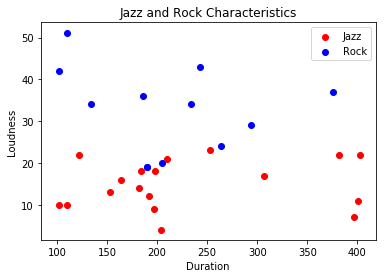

In [78]:
music = pd.DataFrame()

#creating data to mess around with
# Some data to play with.
music['Duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['Loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['Jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0] 

plt.scatter(
    music[music['Jazz'] == 1].Duration,
    music[music['Jazz'] == 1].Loudness,
    color = 'red')

plt.scatter(
    music[music['Jazz'] == 0].Duration,
    music[music['Jazz'] == 0].Loudness,
    color = 'blue')

plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

Q - so in nearest neighbor it says 'when tyring to predict an observation, we find the closest known observation in our training data' so...we aren't actually building a model then right? Just measuring proximity? How does this translate into unknown data?

In [98]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['Loudness', 'Duration']]
Y = music.Jazz
neighbors.fit(X,Y)

#predicting a song
print(neighbors.predict([[19, 190]]))
print(neighbors.predict_proba([[19,190]]))

[0]
[[ 1.  0.]]


Q - so are the above stats saying that 80% of the neighbors  voted that it was in fact Jazz?

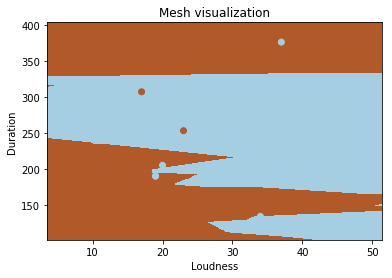

In [80]:
#converting data to arrays instead of DF's
X = np.array(X)
Y = np.array(Y)

#setting the mesh size
h = .1

#plot the decision boundary, assigning a color to each mesh point
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5 #why isn't this Y[:,0]?
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h), #what does arange do again?
    np.arange(y_min, y_max, h))

Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

#plotting the results in color
Z = Z.reshape(xx.shape)
plt.figure(1, figsize = (6,4))
plt.set_cmap(plt.cm.Paired) #not sure what this is
plt.pcolormesh(xx, yy, Z)

#add in the training points
plt.scatter(X[:,0], X[:,1], c=Y) #how can color = an array?
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Building my own KNN function from scratch

In [81]:
#need to build my own KNN
#start with a function that measures the pythag theorem of an input
#variable against each coordinate combo in the training set

#This function will keep the smallest distance coordinate combo and
#return the corresponding prediction

In [82]:
music1 = pd.DataFrame()
music1['Duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music1['Loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music1['Jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0] 

In [111]:
#My function that replicates the SKLearn model
def KNN_Finder(lou, dur):
    ttl = 100 #there is probably a better way to do this
    pair = [] #this isn't necessary, just for diagnostic purposes
    ans = []
    for i in range(len(music1)):
        d = music1.Duration
        l = music1.Loudness
        pythag = ((dur - d[i])**2 + (lou - l[i])**2)**.5
        if pythag < ttl:
            ttl = pythag
            pair = [l[i], d[i]]
            ans = music1.Jazz[i]
    return ans, pair

In [112]:
KNN_Finder(17, 181) #So the function works

(1, [18, 184])

In [113]:
#this function tests my KNN function against the SKLearn model
def Tester(lou, dur):
    me = KNN_Finder(lou, dur)
    SK = neighbors.predict([[lou, dur]])
    print('Me: ', me)
    print('SK: ', SK)

In [114]:
Tester(17, 181)

Me:  (1, [18, 184])
SK:  [1]


In [ ]:
#Need to make this a true KNN model from scratch by adding another
#parameter that allows for increasing the number of neighbors
